In [66]:
import sys
paths = [
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/config",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/ds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_intrinio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/common/web",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_portfolio",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium/api",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/test/selenium",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/estypes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esmappings",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/esindexes",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_elasticsearch/utils",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch_ingestion",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/util",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_quandl",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_snp",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/public",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_barchart",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_redis",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/models",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_twitter",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_edgar",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_fred",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_oecd",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/common/sbt_websocket",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/util/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/elasticsearch/helper",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/serverless/symbol_mapping",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/scripts/aws/sbt_elasticsearch",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cryptocurrency",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/services/user",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_cbonds",
        "/Users/tbui/workstation/Stansberry-Terminal-MkI/datafactory/vendor/sbt_brokers"
]

In [67]:
sys.path += paths


In [68]:
# !pip install elasticsearch-dsl

In [69]:
# !pip install psycopg2-binary

In [70]:

from pandas.io import sql as psql

In [71]:
from lib.connected_db import PgsqlExecutor

In [72]:
snpsource = {
        "host": "snp-instance-1-us-east-1b.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "snpx_read",
        "credentials": "Nsp563Xz",
        "database": "xpressfeed"
      }

research_db = {
        "host": "dev-df-postgresql.csodrrohkuas.us-east-1.rds.amazonaws.com",
        "port": 5432,
        "user": "df_user",
        "credentials": "Piq914sT",
        "database": "datafactory"
      }

In [177]:
db = PgsqlExecutor(research_db)


In [74]:
sql = """

select * from model.dcf_values order by symbol, fiscal_year, created desc
"""
data = db.get_dataframe(sql)
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   89118      A           NYSE        2587460          1       54.75000   
1  108754      A           NYSE        2587460          1       28.50999   
2  127794      A           NYSE        2587460          1       17.96000   
3  179418      A           NYSE        2587460          1       29.24000   
4  179857      A           NYSE        2587460          1       24.10000   

   market_growth_rate  current_growth_rate  fiscal_year  total_years  \
0               0.095               -5.720       2000.0          2.0   
1               0.095               -3.896       2001.0          3.0   
2               0.095               -3.106       2002.0          4.0   
3               0.095               -2.106       2003.0          5.0   
4               0.095               -0.897       2004.0          5.0   

   market_dcf  dcf                                              error  \
0        54.7  0.0  missing cash_interest_paid: single positional ...   
1        21.8  0.0                                                      
2        16.9  0.0                                                      
3        29.9  0.0                                                      
4        23.9  0.1                                                      

                     created  
0 2020-06-10 14:05:15.490086  
1 2020-06-10 15:40:51.179175  
2 2020-06-10 17:19:06.127681  
3 2020-06-11 00:36:23.941796  
4 2020-06-11 00:38:43.937018

In [75]:
def shifted_by(pd_series, row_shift):
    """
    get close price the day before shifted_by(data['close'], 1)
    :return: shifted_vals
    """
    shifted_vals = pd_series.iloc[:-row_shift]
    shifted_vals.index = pd_series.index[row_shift:]
    return shifted_vals

In [76]:
data.loc[:, 'last_symbol'] = shifted_by(data['symbol'], 1)
data.loc[:, 'last_price'] = shifted_by(data['current_price'], 1)
data.loc[:, 'last_growth_rate'] = shifted_by(data['current_growth_rate'], 1)
data.loc[:, 'last_fiscal_year'] = shifted_by(data['fiscal_year'], 1)
data.loc[:, 'last_market_dcf'] = shifted_by(data['market_dcf'], 1)
data.loc[:, 'last_dcf'] = shifted_by(data['dcf'], 1)


In [77]:
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   89118      A           NYSE        2587460          1       54.75000   
1  108754      A           NYSE        2587460          1       28.50999   
2  127794      A           NYSE        2587460          1       17.96000   
3  179418      A           NYSE        2587460          1       29.24000   
4  179857      A           NYSE        2587460          1       24.10000   

   market_growth_rate  current_growth_rate  fiscal_year  total_years  \
0               0.095               -5.720       2000.0          2.0   
1               0.095               -3.896       2001.0          3.0   
2               0.095               -3.106       2002.0          4.0   
3               0.095               -2.106       2003.0          5.0   
4               0.095               -0.897       2004.0          5.0   

   market_dcf  dcf                                              error  \
0        54.7  0.0  missing cash_interest_paid: single positional ...   
1        21.8  0.0                                                      
2        16.9  0.0                                                      
3        29.9  0.0                                                      
4        23.9  0.1                                                      

                     created last_symbol  last_price  last_growth_rate  \
0 2020-06-10 14:05:15.490086         NaN         NaN               NaN   
1 2020-06-10 15:40:51.179175           A    54.75000            -5.720   
2 2020-06-10 17:19:06.127681           A    28.50999            -3.896   
3 2020-06-11 00:36:23.941796           A    17.96000            -3.106   
4 2020-06-11 00:38:43.937018           A    29.24000            -2.106   

   last_fiscal_year  last_market_dcf  last_dcf  
0               NaN              NaN       NaN  
1            2000.0             54.7       0.0  
2            2001.0             21.8       0.0  
3            2002.0             16.9       0.0  
4            2003.0             29.9       0.0

In [78]:
def convert_direction(value):
    if value > 0:
        return 1
    return -1
data["price_change"] = data["current_price"] - data["last_price"]
data["direction"] = data["price_change"].apply(convert_direction)
data["correct"] = data["symbol"] == data["last_symbol"]
data["fiscal_change"] = data["fiscal_year"] - data["last_fiscal_year"]
data["growth_changes"] = data["current_growth_rate"] - data["last_growth_rate"]
data["market_dcf_change"] = (data["market_dcf"] - data["last_market_dcf"]) * 100 / data["last_price"]
data["dcf_change"] = (data["dcf"] - data["last_dcf"]) * 100 / data["last_price"]
data["dcf_to_price"] = (data["last_dcf"] - data["last_price"]) * 100 / data["last_price"]
data["market_dcf_to_price"] = (data["last_market_dcf"] - data["last_price"]) * 100 / data["last_price"]





In [79]:
data.head()

id symbol exchangesymbol  tradingitemid  is_active  current_price  \
0   89118      A           NYSE        2587460          1       54.75000   
1  108754      A           NYSE        2587460          1       28.50999   
2  127794      A           NYSE        2587460          1       17.96000   
3  179418      A           NYSE        2587460          1       29.24000   
4  179857      A           NYSE        2587460          1       24.10000   

   market_growth_rate  current_growth_rate  fiscal_year  total_years  ...  \
0               0.095               -5.720       2000.0          2.0  ...   
1               0.095               -3.896       2001.0          3.0  ...   
2               0.095               -3.106       2002.0          4.0  ...   
3               0.095               -2.106       2003.0          5.0  ...   
4               0.095               -0.897       2004.0          5.0  ...   

   last_dcf  price_change direction correct fiscal_change  growth_changes  \
0       NaN           NaN        -1   False           NaN             NaN   
1       0.0     -26.24001        -1    True           1.0           1.824   
2       0.0     -10.54999        -1    True           1.0           0.790   
3       0.0      11.28000         1    True           1.0           1.000   
4       0.0      -5.14000        -1    True           1.0           1.209   

   market_dcf_change  dcf_change  dcf_to_price  market_dcf_to_price  
0                NaN         NaN           NaN                  NaN  
1         -60.091324    0.000000        -100.0            -0.091324  
2         -17.186958    0.000000        -100.0           -23.535575  
3          72.383073    0.000000        -100.0            -5.902004  
4         -20.519836    0.341997        -100.0             2.257182  

[5 rows x 29 columns]

In [80]:
new_data = data[(data["correct"])&(data["fiscal_change"] == 1) &(data["is_active"] == 1)&(data["total_years"] == 5)]

In [81]:
print (new_data.shape)
new_data.head()

(32397, 29)


id symbol exchangesymbol  tradingitemid  is_active  current_price  \
3  179418      A           NYSE        2587460          1          29.24   
4  179857      A           NYSE        2587460          1          24.10   
5   89109      A           NYSE        2587460          1          33.29   
6  115325      A           NYSE        2587460          1          34.85   
7  141405      A           NYSE        2587460          1          36.74   

   market_growth_rate  current_growth_rate  fiscal_year  total_years  ...  \
3               0.095               -2.106       2003.0          5.0  ...   
4               0.095               -0.897       2004.0          5.0  ...   
5               0.095                1.576       2005.0          5.0  ...   
6               0.095                1.925       2006.0          5.0  ...   
7               0.095                1.718       2007.0          5.0  ...   

   last_dcf  price_change direction correct fiscal_change  growth_changes  \
3       0.0         11.28         1    True           1.0           1.000   
4       0.0         -5.14        -1    True           1.0           1.209   
5       0.1          9.19         1    True           1.0           2.473   
6     165.1          1.56         1    True           1.0           0.349   
7     338.1          1.89         1    True           1.0          -0.207   

   market_dcf_change  dcf_change  dcf_to_price  market_dcf_to_price  
3          72.383073    0.000000   -100.000000            -5.902004  
4         -20.519836    0.341997   -100.000000             2.257182  
5          31.120332  684.647303    -99.585062            -0.829876  
6          21.628117  519.675578    395.944728            -5.677381  
7          17.503587  -50.215208    870.157819            10.760402  

[5 rows x 29 columns]

In [82]:
new_data =new_data.loc[:, ["symbol", "current_price","last_price", "last_growth_rate","current_growth_rate", "market_dcf", "dcf", "growth_changes",
                          "market_dcf_change", "dcf_change", "last_fiscal_year", "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price","price_change", 
                           "direction"]].iloc[1:, :]

In [83]:
new_data["price_change_perf"] = (new_data["current_price"] - new_data["last_price"]) * 100 / new_data["last_price"]


In [84]:
new_data.head()

symbol  current_price  last_price  last_growth_rate  current_growth_rate  \
4      A          24.10       29.24            -2.106               -0.897   
5      A          33.29       24.10            -0.897                1.576   
6      A          34.85       33.29             1.576                1.925   
7      A          36.74       34.85             1.925                1.718   
8      A          15.63       36.74             1.718                1.874   

   market_dcf    dcf  growth_changes  market_dcf_change  dcf_change  \
4        23.9    0.1           1.209         -20.519836    0.341997   
5        31.4  165.1           2.473          31.120332  684.647303   
6        38.6  338.1           0.349          21.628117  519.675578   
7        44.7  320.6          -0.207          17.503587  -50.215208   
8        26.2  431.9           0.156         -50.353838  302.939575   

   last_fiscal_year  last_market_dcf  last_dcf  dcf_to_price  \
4            2003.0             29.9       0.0   -100.000000   
5            2004.0             23.9       0.1    -99.585062   
6            2005.0             31.4     165.1    395.944728   
7            2006.0             38.6     338.1    870.157819   
8            2007.0             44.7     320.6    772.618400   

   market_dcf_to_price  price_change  direction  price_change_perf  
4             2.257182         -5.14         -1         -17.578659  
5            -0.829876          9.19          1          38.132780  
6            -5.677381          1.56          1           4.686092  
7            10.760402          1.89          1           5.423242  
8            21.665759        -21.11         -1         -57.457812

In [85]:
# new_data = new_data[(new_data["price_change_perf"] < 100) & (new_data["price_change_perf"] > -100) ]

In [86]:
new_data[new_data["direction"] ==1]["dcf_to_price"].describe()

count    1.698600e+04
mean              NaN
std               NaN
min              -inf
25%     -1.000000e+02
50%      2.232904e+00
75%      1.527643e+02
max               inf
Name: dcf_to_price, dtype: float64

In [87]:
dcf_to_price = new_data[(new_data["direction"] == 1) 
                        & (new_data["dcf_to_price"] > -110)
                        & (new_data["dcf_to_price"] < 200)]
dcf_to_price = dcf_to_price.loc[:, 'dcf_to_price'].values

(array([ 190., 5275.,  170.,   85.,   61.,   55.,   41.,   42.,   41.,
          44.,   39.,   37.,   47.,   86.,  148.,  267.,  343.,  341.,
         356.,  388.,  309.,  281.,  247.,  226.,  205.,  215.,  152.,
         186.,  136.,  117.,  134.,   82.,  112.,   82.,   74.,   69.,
          63.,   60.,   57.,   52.]),
 array([-109.95024876, -102.20329499,  -94.45634122,  -86.70938745,
         -78.96243369,  -71.21547992,  -63.46852615,  -55.72157238,
         -47.97461862,  -40.22766485,  -32.48071108,  -24.73375731,
         -16.98680355,   -9.23984978,   -1.49289601,    6.25405776,
          14.00101152,   21.74796529,   29.49491906,   37.24187283,
          44.9888266 ,   52.73578036,   60.48273413,   68.2296879 ,
          75.97664167,   83.72359543,   91.4705492 ,   99.21750297,
         106.96445674,  114.7114105 ,  122.45836427,  130.20531804,
         137.95227181,  145.69922557,  153.44617934,  161.19313311,
         168.94008688,  176.68704064,  184.43399441,  192.18094818

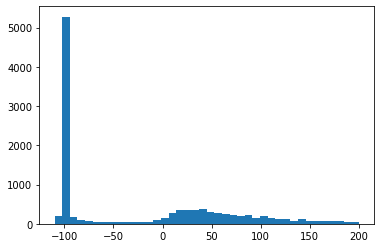

In [89]:
import matplotlib.pyplot as plt

plt.hist(dcf_to_price, bins=40)

In [90]:
new_data[new_data["direction"] == 1]["market_dcf_to_price"].describe()

count    1.698600e+04
mean              inf
std               NaN
min     -1.656799e+16
25%      1.472517e+00
50%      3.689635e+01
75%      1.027446e+02
max               inf
Name: market_dcf_to_price, dtype: float64

(array([  31.,   16.,   24.,   17.,   25.,   38.,   31.,   40.,   43.,
         114.,   28.,   31.,   36.,   38.,   40.,   58.,   86.,  157.,
         282.,  738., 1143., 1255., 1192., 1105.,  889.,  796.,  600.,
         563.,  480.,  386.,  311.,  252.,  192.,  158.,  152.,  114.,
         107.,   99.,  100.,   74.]),
 array([-196.90721649, -186.98664223, -177.06606797, -167.14549371,
        -157.22491945, -147.30434518, -137.38377092, -127.46319666,
        -117.5426224 , -107.62204813,  -97.70147387,  -87.78089961,
         -77.86032535,  -67.93975108,  -58.01917682,  -48.09860256,
         -38.1780283 ,  -28.25745403,  -18.33687977,   -8.41630551,
           1.50426875,   11.42484302,   21.34541728,   31.26599154,
          41.1865658 ,   51.10714007,   61.02771433,   70.94828859,
          80.86886285,   90.78943712,  100.71001138,  110.63058564,
         120.5511599 ,  130.47173416,  140.39230843,  150.31288269,
         160.23345695,  170.15403121,  180.07460548,  189.99517974

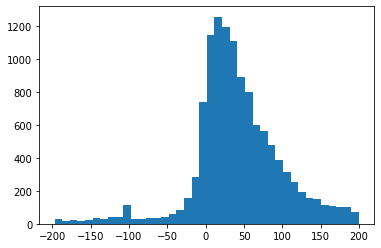

In [91]:
market_dcf_to_price = new_data[(new_data["direction"] == 1) 
                        & (new_data["market_dcf_to_price"] > -200)
                        & (new_data["market_dcf_to_price"] < 200)]
market_dcf_to_price = market_dcf_to_price.loc[:, 'market_dcf_to_price'].values

plt.hist(market_dcf_to_price, bins=40)

In [92]:
new_data[new_data["direction"] == 1]["last_growth_rate"].describe()

count    17465.000000
mean        -0.769384
std         88.050496
min      -9723.113000
25%         -1.130000
50%          0.051000
75%          0.508000
max       2796.298000
Name: last_growth_rate, dtype: float64

In [93]:
last_growth_rate = new_data[(new_data["direction"] == 1) 
                        & (new_data["last_growth_rate"] > -0.88)
                        & (new_data["last_growth_rate"] < 0.65)]
last_growth_rate = last_growth_rate.loc[:, 'last_growth_rate'].values

(array([ 98.,  94.,  91.,  91.,  91.,  87., 104.,  78., 101., 102., 105.,
        103., 103.,  97., 109., 118., 138., 159., 163., 218., 232., 306.,
        381., 451., 514., 630., 486., 461., 405., 407., 343., 283., 264.,
        252., 219., 225., 186., 171., 127., 145.]),
 array([-8.790e-01, -8.408e-01, -8.026e-01, -7.644e-01, -7.262e-01,
        -6.880e-01, -6.498e-01, -6.116e-01, -5.734e-01, -5.352e-01,
        -4.970e-01, -4.588e-01, -4.206e-01, -3.824e-01, -3.442e-01,
        -3.060e-01, -2.678e-01, -2.296e-01, -1.914e-01, -1.532e-01,
        -1.150e-01, -7.680e-02, -3.860e-02, -4.000e-04,  3.780e-02,
         7.600e-02,  1.142e-01,  1.524e-01,  1.906e-01,  2.288e-01,
         2.670e-01,  3.052e-01,  3.434e-01,  3.816e-01,  4.198e-01,
         4.580e-01,  4.962e-01,  5.344e-01,  5.726e-01,  6.108e-01,
         6.490e-01]),
 <a list of 40 Patch objects>)

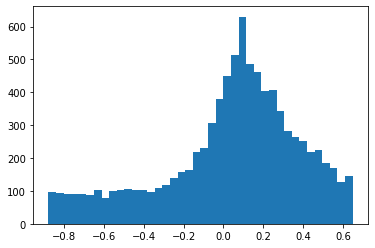

In [94]:
plt.hist(last_growth_rate, bins=40)

In [95]:
new_data[new_data["direction"] == -1]["dcf_to_price"].describe()

count    1.403100e+04
mean    -1.520031e+14
std      1.041284e+16
min     -9.940691e+17
25%     -1.000000e+02
50%     -1.000000e+02
75%      1.242791e+02
max      1.109842e+15
Name: dcf_to_price, dtype: float64

(array([  27.,   23.,   23.,   23.,   44.,   36.,   51.,   66.,  105.,
        4516.,  541.,  109.,   84.,   54.,   46.,   46.,   38.,   56.,
          57.,   75.,  163.,  257.,  305.,  266.,  226.,  201.,  209.,
         183.,  159.,  114.,  114.,  103.,   96.,   82.,   66.,   60.,
          47.,   51.,   55.,   54.]),
 array([-1.99806047e+02, -1.89823632e+02, -1.79841217e+02, -1.69858803e+02,
        -1.59876388e+02, -1.49893973e+02, -1.39911559e+02, -1.29929144e+02,
        -1.19946730e+02, -1.09964315e+02, -9.99819003e+01, -8.99994857e+01,
        -8.00170710e+01, -7.00346564e+01, -6.00522418e+01, -5.00698272e+01,
        -4.00874125e+01, -3.01049979e+01, -2.01225833e+01, -1.01401686e+01,
        -1.57754013e-01,  9.82466062e+00,  1.98070752e+01,  2.97894899e+01,
         3.97719045e+01,  4.97543191e+01,  5.97367338e+01,  6.97191484e+01,
         7.97015630e+01,  8.96839777e+01,  9.96663923e+01,  1.09648807e+02,
         1.19631222e+02,  1.29613636e+02,  1.39596051e+02,  1.49578465

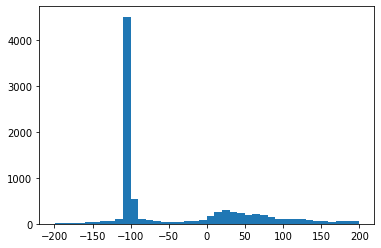

In [96]:
dcf_to_price = new_data[(new_data["direction"] == -1) 
                        & (new_data["dcf_to_price"] > -200)
                        & (new_data["dcf_to_price"] < 200)]
dcf_to_price = dcf_to_price.loc[:, 'dcf_to_price'].values

plt.hist(dcf_to_price, bins=40)

In [97]:
new_data[new_data["direction"] == -1]["market_dcf_to_price"].describe()

count    1.403200e+04
mean              inf
std               NaN
min     -1.730733e+09
25%     -1.000000e+02
50%      2.400349e+01
75%      1.028599e+02
max               inf
Name: market_dcf_to_price, dtype: float64

(array([ 39.,  25.,  19.,  29.,  37.,  36.,  36.,  60.,  57., 166.,  34.,
         34.,  36.,  33.,  29.,  49.,  82., 124., 252., 625., 955., 882.,
        771., 698., 550., 442., 410., 322., 327., 268., 168., 158., 105.,
        135., 103.,  79.,  69.,  61.,  64.,  52.]),
 array([-1.99650350e+02, -1.89659091e+02, -1.79667832e+02, -1.69676573e+02,
        -1.59685315e+02, -1.49694056e+02, -1.39702797e+02, -1.29711538e+02,
        -1.19720280e+02, -1.09729021e+02, -9.97377622e+01, -8.97465035e+01,
        -7.97552448e+01, -6.97639860e+01, -5.97727273e+01, -4.97814685e+01,
        -3.97902098e+01, -2.97989510e+01, -1.98076923e+01, -9.81643357e+00,
         1.74825175e-01,  1.01660839e+01,  2.01573427e+01,  3.01486014e+01,
         4.01398601e+01,  5.01311189e+01,  6.01223776e+01,  7.01136364e+01,
         8.01048951e+01,  9.00961538e+01,  1.00087413e+02,  1.10078671e+02,
         1.20069930e+02,  1.30061189e+02,  1.40052448e+02,  1.50043706e+02,
         1.60034965e+02,  1.70026224e+02, 

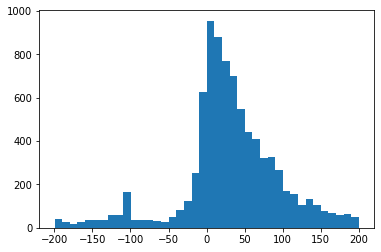

In [98]:
market_dcf_to_price = new_data[(new_data["direction"] == -1) 
                        & (new_data["market_dcf_to_price"] > -200)
                        & (new_data["market_dcf_to_price"] < 200)]
market_dcf_to_price = market_dcf_to_price.loc[:, 'market_dcf_to_price'].values

plt.hist(market_dcf_to_price, bins=40)

In [99]:
new_data[new_data["direction"] == -1]["last_growth_rate"].describe()

count    14621.000000
mean        -2.306916
std        150.144349
min     -12963.325000
25%         -1.302000
50%         -0.007000
75%          0.558000
max       3279.901000
Name: last_growth_rate, dtype: float64

(array([ 39.,  25.,  19.,  29.,  37.,  36.,  36.,  60.,  57., 166.,  34.,
         34.,  36.,  33.,  29.,  49.,  82., 124., 252., 625., 955., 882.,
        771., 698., 550., 442., 410., 322., 327., 268., 168., 158., 105.,
        135., 103.,  79.,  69.,  61.,  64.,  52.]),
 array([-1.99650350e+02, -1.89659091e+02, -1.79667832e+02, -1.69676573e+02,
        -1.59685315e+02, -1.49694056e+02, -1.39702797e+02, -1.29711538e+02,
        -1.19720280e+02, -1.09729021e+02, -9.97377622e+01, -8.97465035e+01,
        -7.97552448e+01, -6.97639860e+01, -5.97727273e+01, -4.97814685e+01,
        -3.97902098e+01, -2.97989510e+01, -1.98076923e+01, -9.81643357e+00,
         1.74825175e-01,  1.01660839e+01,  2.01573427e+01,  3.01486014e+01,
         4.01398601e+01,  5.01311189e+01,  6.01223776e+01,  7.01136364e+01,
         8.01048951e+01,  9.00961538e+01,  1.00087413e+02,  1.10078671e+02,
         1.20069930e+02,  1.30061189e+02,  1.40052448e+02,  1.50043706e+02,
         1.60034965e+02,  1.70026224e+02, 

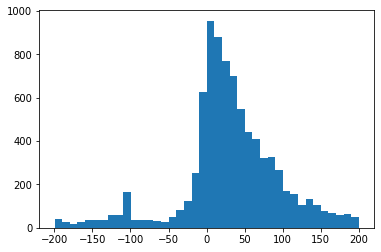

In [100]:
last_growth_rate = new_data[(new_data["direction"] == -1) 
                        & (new_data["last_growth_rate"] > -1)
                        & (new_data["last_growth_rate"] < 1)]
last_growth_rate = last_growth_rate.loc[:, 'last_growth_rate'].values

plt.hist(market_dcf_to_price, bins=40)

In [101]:
import numpy as np
import pandas as pd

In [102]:
# csv_file = "./make_dcf_model_0605.csv"
# data = pd.read_csv(csv_file, header=0, index_col=0)

In [108]:
new_data["price_change_perf"] = (new_data["current_price"] - new_data["last_price"]) * 100 / new_data["last_price"]

In [109]:


features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

X = new_data[features].values
Y = (new_data.loc[:, 'price_change_perf'].values) 

In [110]:
from numpy import loadtxt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [111]:
# !pip3 install sklearn

In [112]:

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [113]:
# !pip3 install matplotlib

In [114]:
import matplotlib.pyplot as plt
# plt.hist(y_test, bins=40)

In [115]:
filtered_outliner = new_data[(new_data["price_change_perf"] < 100) & (new_data["price_change_perf"] > -100) ]

In [142]:
features = [ "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

X = filtered_outliner[features].values
Y = (filtered_outliner.loc[:, 'price_change_perf'].values) 
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

(array([ 61.,  67.,  64.,  93.,  96., 139., 139., 163., 176., 174., 206.,
        226., 269., 312., 318., 374., 396., 459., 515., 526., 586., 551.,
        558., 508., 442., 384., 347., 295., 258., 217., 187., 139., 127.,
        114.,  85.,  97.,  86.,  68.,  58.,  44.]),
 array([-99.9992308 , -95.00908287, -90.01893494, -85.02878702,
        -80.03863909, -75.04849116, -70.05834323, -65.0681953 ,
        -60.07804737, -55.08789945, -50.09775152, -45.10760359,
        -40.11745566, -35.12730773, -30.1371598 , -25.14701188,
        -20.15686395, -15.16671602, -10.17656809,  -5.18642016,
         -0.19627223,   4.79387569,   9.78402362,  14.77417155,
         19.76431948,  24.75446741,  29.74461534,  34.73476326,
         39.72491119,  44.71505912,  49.70520705,  54.69535498,
         59.68550291,  64.67565083,  69.66579876,  74.65594669,
         79.64609462,  84.63624255,  89.62639048,  94.6165384 ,
         99.60668633]),
 <a list of 40 Patch objects>)

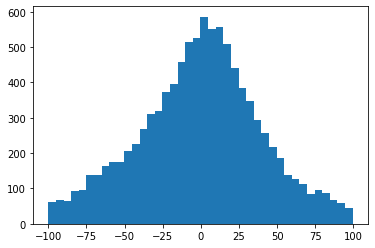

In [143]:
plt.hist(y_test, bins=40)

(array([ 176.,  176.,  201.,  272.,  348.,  395.,  441.,  509.,  532.,
         612.,  601.,  745.,  829.,  922., 1006., 1116., 1251., 1346.,
        1578., 1736., 1602., 1631., 1714., 1533., 1339., 1157.,  999.,
         879.,  756.,  673.,  507.,  442.,  412.,  339.,  284.,  260.,
         235.,  211.,  164.,  142.]),
 array([-9.99993802e+01, -9.49993957e+01, -8.99994112e+01, -8.49994267e+01,
        -7.99994422e+01, -7.49994577e+01, -6.99994732e+01, -6.49994887e+01,
        -5.99995042e+01, -5.49995197e+01, -4.99995351e+01, -4.49995506e+01,
        -3.99995661e+01, -3.49995816e+01, -2.99995971e+01, -2.49996126e+01,
        -1.99996281e+01, -1.49996436e+01, -9.99965911e+00, -4.99967460e+00,
         3.09901333e-04,  5.00029441e+00,  1.00002789e+01,  1.50002634e+01,
         2.00002479e+01,  2.50002324e+01,  3.00002169e+01,  3.50002014e+01,
         4.00001859e+01,  4.50001704e+01,  5.00001550e+01,  5.50001395e+01,
         6.00001240e+01,  6.50001085e+01,  7.00000930e+01,  7.50000775

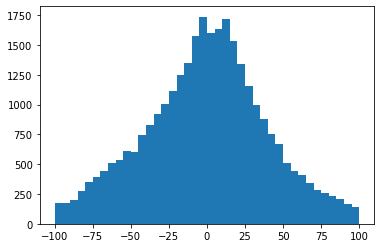

In [144]:
plt.hist(Y, bins=40)

In [145]:
# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
y_pred = model.predict(X_test)

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 6.000e+00, 3.000e+00, 9.000e+00, 8.000e+00, 1.700e+01,
        2.200e+01, 2.400e+01, 3.000e+01, 3.900e+01, 8.400e+01, 7.900e+01,
        1.370e+02, 1.840e+02, 2.140e+02, 3.330e+02, 6.380e+02, 5.790e+02,
        6.010e+02, 7.530e+02, 1.012e+03, 1.477e+03, 1.696e+03, 1.134e+03,
        4.560e+02, 1.900e+02, 9.700e+01, 5.100e+01, 1.300e+01, 1.300e+01,
        9.000e+00, 2.000e+00, 5.000e+00, 2.000e+00]),
 array([-99.90952  , -96.117935 , -92.326355 , -88.53477  , -84.74318  ,
        -80.9516   , -77.16001  , -73.36842  , -69.57684  , -65.785255 ,
        -61.99367  , -58.202087 , -54.4105   , -50.618916 , -46.82733  ,
        -43.035744 , -39.24416  , -35.452576 , -31.66099  , -27.869406 ,
        -24.07782  , -20.286234 , -16.49465  , -12.703064 ,  -8.911479 ,
         -5.119894 ,  -1.3283088,   2.4632764,   6.2548614,  10.046447 ,
         13.838032 ,  17.629618 ,  21.421202 ,  25.212788 ,  29.

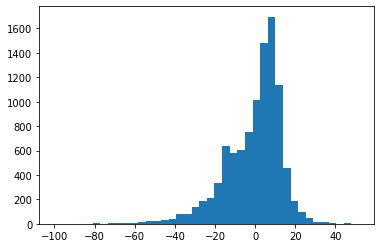

In [147]:
plt.hist(y_pred, bins=40)

In [148]:
# plt.plot(range(y_pred.shape[0]), y_pred, 'b-')
# plt.plot(range(y_test.shape[0]), y_test, 'g-')
# plt.show()

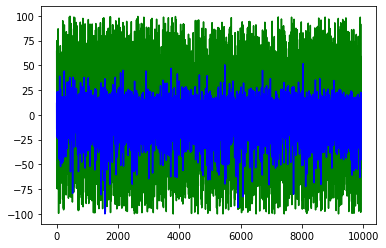

In [149]:
plt.plot(range(y_test.shape[0]), y_test, 'g-')
plt.plot(range(y_pred.shape[0]), y_pred, 'b-')

plt.show()

In [160]:
accuracy = accuracy_score(y_test >= 30, y_pred >= 30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.65%


In [151]:
accuracy = accuracy_score(y_test >= 40, y_pred >= 40)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.18%


In [152]:
accuracy = accuracy_score(y_test < -30, y_pred < -30)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.92%


In [153]:
accuracy = accuracy_score(y_test < -40, y_pred < -40)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.67%


In [169]:
accuracy = accuracy_score(y_test < -35, y_pred >35)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.90%


In [163]:
def test_accuracy(pred, Y, test_value):
    count_up = 0
    total = 0
    if test_value > 0:
        for i, j in zip(Y, pred):
            if j > test_value:
                total += 1
                if i > test_value:
                    count_up += 1
    if test_value < 0:
        for i, j in zip(Y, pred):
            if j < test_value:
                total += 1
                if i < test_value:
                    count_up += 1
        

    print(count_up/total, len(pred > 30))

In [174]:
test_accuracy(y_test, y_pred,  -20)

0.15512465373961218 9924


In [166]:
y_test < -35

array([False, False, False, ..., False,  True, False])

In [176]:
y_pred ==0

array([False, False, False, ..., False, False, False])

In [155]:
len(y_pred > 30)

9924

In [130]:
sql = """
select symbol, current_price , current_growth_rate as last_growth_rate, 
market_dcf as last_market_dcf, dcf  as last_dcf, fiscal_year, 
(dcf - current_price) * 100 / current_price as dcf_to_price,
(market_dcf - current_price) * 100 / current_price as market_dcf_to_price

from model.dcf_values where is_active =1 and current_price > 1 and total_years = 5 and fiscal_year = 2018

"""
data = db.get_dataframe(sql)

In [131]:
features = [ "symbol", "fiscal_year", "current_price", "last_growth_rate",
                         "last_market_dcf", "last_dcf", 
                           "dcf_to_price", "market_dcf_to_price"]

count = 1

ret_predict_values = []

for row in data.loc[:, features].values:
    pred_values = model.predict(np.array(
        [np.array(row[3:])]
    ))
    
    if row[0] == 'AMZN':
        print(row, pred_values)
        
    if pred_values[0] > 10 and row[1] >= 2018:
        ret_predict_values.append([row[0], pred_values[0], row[1], row[2], row[3], row[4],row[5] ])
#         print(count, row[0], pred_values, row[1])
        count += 1


for row in sorted(ret_predict_values, key=lambda d:d[1], reverse=True)[0:40]:
    print (row)

['AMZN' 2018 1501.97 0.68 219753.8 1818054.4 120944.65468684462
 14531.037903553333] [-60.75402]
['ALGT', 47.8397, 2018, 100.22, 45.353, -180.3, 252772674.9]
['HALL', 44.140705, 2018, 10.69, 11.905, 46.3, -43949578.0]
['IDN', 42.088894, 2018, 2.14, 0.604, 1775.6, 11974.5]
['PESI', 40.224236, 2018, 2.35, 1.863, 4.3, 91.1]
['WLFC', 39.138565, 2018, 34.6, 6.492, 1901.6, 29289252.4]
['UUU', 37.599594, 2018, 1.06, 2.497, -24.8, -7741.8]
['CABO', 36.954292, 2018, 820.1, 0.042, 1221.4, 1183.6]
['SPTN', 36.69051, 2018, 17.18, 0.889, 48.5, 110.8]
['CDE', 36.178104, 2018, 4.47, 25.954, 11.2, 1050284.7]
['CARA', 34.674507, 2018, 13.0, 0.262, 44.2, 91.0]
['CLRB', 34.113735, 2018, 1.55, 0.344, 1342.8, 3748.3]
['TCMD', 32.37612, 2018, 45.55, -73.62, 43.6, 0.0]
['CPB', 31.854006, 2018, 32.99, 0.059, 83.3, 81.5]
['ORBT', 31.452856, 2018, 5.5, -5.385, 7.3, 0.0]
['CFX', 31.180214, 2018, 20.9, -0.241, 41.8, 113.9]
['FHRT', 31.159554, 2018, 2.25, 1.28, 127.1, 750.4]
['NM', 30.796244, 2018, 2.74, -1.631, 1

In [132]:
new_data.to_csv("make_dcf_model_0612_put_83_accuracy.csv")

In [133]:
import pickle, simplejson

In [135]:
from mapper.predict_logic_mapper import MapperPredictLogic, simplejson

In [178]:
logic_mapper = MapperPredictLogic(db)

In [156]:


# dto = logic_mapper.get_dto(
# name="dcf_put",
# features=simplejson.dumps(features)
    
# )

In [179]:
# logic_mapper.insert(dto, update_on_conflict="name")